## Mutual Information

The Automobile dataset consists of 193 cars from the 1985 model year. The goal for this dataset is to predict a car's price (the target) from 23 of the car's features, such as make, body_style, and horsepower. In this example, we'll rank the features with mutual information and investigate the results by data visualization.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
plt.style.use("seaborn-whitegrid")

df = pd.read_csv(r"C:\Users\Fujitsu\Desktop\autos.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,125,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,125,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,125,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


- The scikit-learn algorithm for MI treats discrete features differently from continuous features.
- [Categoricals variables](kaggle.com/code/alexisbcook/categorical-variables/tutorial) can be treated as discrete by giving them a label encoding.

In [47]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
print(discrete_features)

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
dtype: bool


Scikit-learn has two mutual information metrics in its <u>feature_selection</u> module:
- one for real-valued (continuous valued) targets **mutual_info_regression**
- one for categorical targets **mutual_info_classif**
Our target, price, is real-valued. 
The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

The data was very messy it had alot of "?" instead of "Null" or zero in many columns, which is remove to calculate MI

In [48]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

engine-size          0.917370
horsepower           0.882662
length               0.606788
fuel-system          0.466199
num-of-cylinders     0.341171
normalized-losses    0.229573
compression-ratio    0.163201
body-style           0.057240
engine-location      0.000000
Name: MI Scores, dtype: float64

And now a bar plot to make comparisions easier:

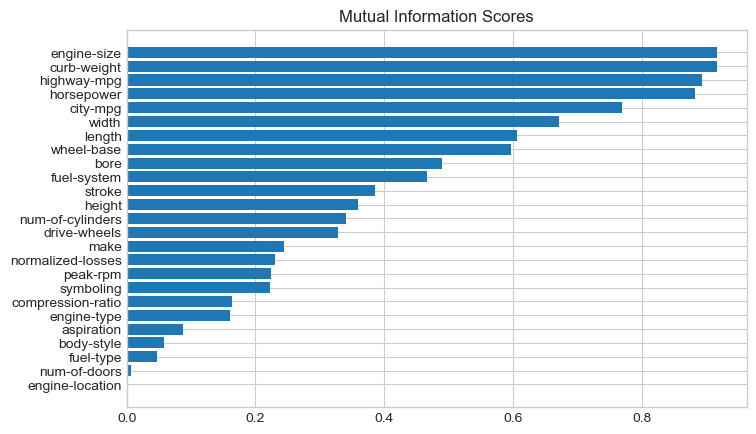

In [49]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Data visualization is a great follow-up to a utility ranking. Let's take a closer look at a couple of these.

As we might expect, the high-scoring curb_weight feature exhibits a strong relationship with price, the target.

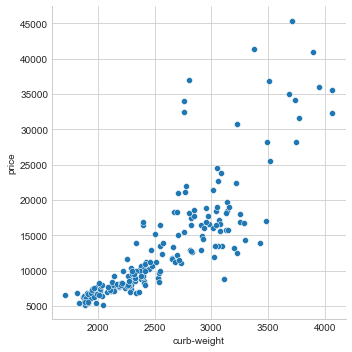

In [52]:
sns.relplot(x="curb-weight", y="price", data=df);

The fuel_type feature has a fairly low MI score, but as we can see from the figure, it clearly separates two price populations with different trends within the horsepower feature. This indicates that fuel_type contributes an interaction effect and might not be unimportant after all. Before deciding a feature is unimportant from its MI score, it's good to investigate any possible interaction effects -- domain knowledge can offer a lot of guidance here.

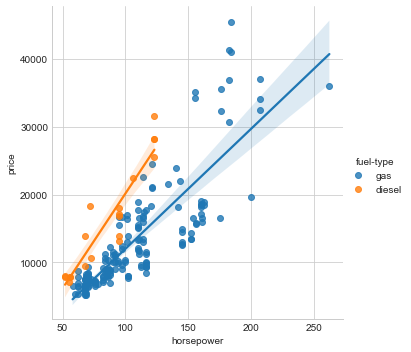

In [54]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df);